In [30]:
PROVIDE_OWN_INPUT = False

In [31]:
from google.colab import files
files.upload()

{}

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
data = pd.read_csv('dum_data.csv')

In [34]:
data.shape

(784, 15)

In [35]:
data.head()

,Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Cons OCF,Cons PAT,OCF/PAT,FR_Dividend Pay Out Ratio(%),Free Float,Ev/EBITDA,M/Sales
0,3I Infotech Ltd.,1681.02,32.07,-39.82,-70.15,-1.18,0.83,5.61,-154.46,-360.03,0.43,0.00,64.50,4.92,0.24
1,3M India Ltd.,1405.10,17.29,8.81,22.66,32.52,3.54,0.25,20.89,64.77,0.32,0.00,12.95,29.25,3.61
2,Aavas Financiers Ltd.,0.29,55.55,2.74,0.03,0.60,0.02,0.00,-0.64,0.00,-160.45,0.00,NaN,0.00,0.00
3,ABB India Ltd.,7451.79,10.57,4.96,14.58,24.79,2.37,0.00,120.00,184.71,0.65,34.43,13.15,41.88,2.25
4,Abbott India Ltd.,1490.21,25.88,15.96,56.69,84.84,3.22,0.00,24.07,120.39,0.20,30.00,21.68,17.60,2.50


In [36]:
data = data.replace( ' -   ', np.nan)

In [37]:
data.dtypes

Company Name                     object
Net Sales                       float64
PBIDTM (%)                      float64
PATM (%)                        float64
ROE (%)                         float64
ROCE (%)                        float64
Asset Turnover(x)               float64
Total Debt/Equity(x)            float64
Cons OCF                        float64
Cons PAT                        float64
OCF/PAT                         float64
FR_Dividend Pay Out Ratio(%)    float64
Free Float                      float64
Ev/EBITDA                       float64
M/Sales                         float64
dtype: object

In [38]:
#data.drop(labels='Company Name', axis=1, inplace=True)

In [39]:
data.iloc[:,1:] = data.iloc[:,1:].astype('float64')

In [40]:
data.fillna(data.mean(), inplace=True)

In [41]:
len(data.columns)

15

# **Ev/EBITDA Prediction**

In [42]:
data1 = data.iloc[:,:-1 ]

In [43]:
data1.head()


,Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Cons OCF,Cons PAT,OCF/PAT,FR_Dividend Pay Out Ratio(%),Free Float,Ev/EBITDA
0,3I Infotech Ltd.,1681.02,32.07,-39.82,-70.15,-1.18,0.83,5.61,-154.46,-360.03,0.43,0.00,64.500000,4.92
1,3M India Ltd.,1405.10,17.29,8.81,22.66,32.52,3.54,0.25,20.89,64.77,0.32,0.00,12.950000,29.25
2,Aavas Financiers Ltd.,0.29,55.55,2.74,0.03,0.60,0.02,0.00,-0.64,0.00,-160.45,0.00,23.129121,0.00
3,ABB India Ltd.,7451.79,10.57,4.96,14.58,24.79,2.37,0.00,120.00,184.71,0.65,34.43,13.150000,41.88
4,Abbott India Ltd.,1490.21,25.88,15.96,56.69,84.84,3.22,0.00,24.07,120.39,0.20,30.00,21.680000,17.60


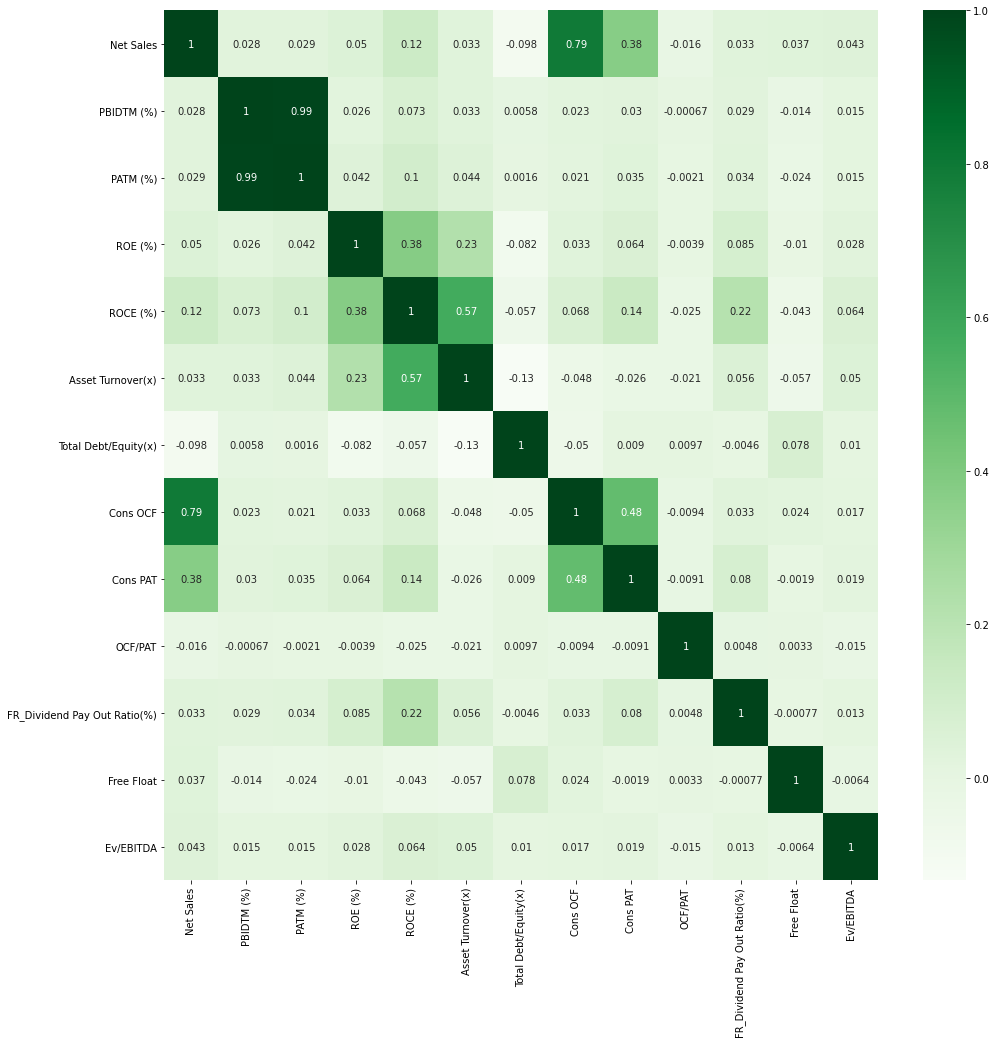

In [44]:
plt.figure(figsize=(16,16))
cor = data1.corr()
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

In [45]:
data.describe()

,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Cons OCF,Cons PAT,OCF/PAT,FR_Dividend Pay Out Ratio(%),Free Float,Ev/EBITDA,M/Sales
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000,784.00000,784.000000
mean,2871.964444,17.808610,2.544184,18.127857,35.016709,1.778801,0.230663,357.803006,273.020026,9.712597,21.227615,23.129121,9.57977,1.699579
std,7143.107050,226.136429,225.663870,139.887254,52.629130,2.014831,11.922658,1282.885094,1220.441750,205.327607,47.599165,12.053937,29.86201,2.575865
min,0.000000,-6257.080000,-6257.110000,-3187.550000,-282.010000,0.000000,-172.520000,-1520.000000,-15646.000000,-350.030000,-895.520000,0.000000,-709.52000,0.000000
25%,284.855000,10.257500,2.457500,6.677500,10.005000,0.880000,0.000000,7.812500,6.495000,0.397500,0.000000,17.087500,3.26000,0.250000
50%,893.500000,18.775000,8.830000,18.600000,24.795000,1.400000,0.080000,49.385000,42.415000,0.940000,13.885000,22.390000,8.04000,1.030000
75%,2215.260000,33.870000,18.072500,36.362500,45.312500,2.302500,0.980000,182.997500,148.130000,1.590000,34.407500,26.505000,13.60000,2.480000
max,74311.600000,209.590000,194.770000,641.270000,481.500000,41.460000,121.660000,17805.000000,12056.390000,5679.500000,471.920000,100.000000,194.68000,49.560000


## Selecting most important features:

In [46]:
cor_target = abs(cor["Ev/EBITDA"])
cor_target.sort_values(ascending=False)[:6]

Ev/EBITDA            1.000000
ROCE (%)             0.063590
Asset Turnover(x)    0.049836
Net Sales            0.042861
ROE (%)              0.028316
Cons PAT             0.018610
Name: Ev/EBITDA, dtype: float64

In [47]:
X,y = data1[['Net Sales', 'ROE (%)', 'ROCE (%)', 'Asset Turnover(x)', 'Cons PAT']], data1['Ev/EBITDA']

In [48]:
from sklearn.model_selection import train_test_split
if PROVIDE_OWN_INPUT:
    X_test =  pd.read_csv('test_data.csv')
    X_train,y_train = X,y
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [24]:
'''
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

mm_X = MinMaxScaler()
X = mm_X.fit_transform(X)
rs_X = RobustScaler()
X = rs_X.fit_transform(X)
'''

'\nfrom sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler\n\n\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\n\nmm_X = MinMaxScaler()\nX = mm_X.fit_transform(X)\nrs_X = RobustScaler()\nX = rs_X.fit_transform(X)\n'

In [49]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=5),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR']
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

### Mean Squared Error
> Lower the value of error, better the performance

In [50]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.10f}'.format(i,r, round(mean_squared_error(y_test.values, p)**0.5,5)))

 0 LassoCV                 14.8781500000
 1 XGBRegressor            24.0039900000
 2 RidgeCV                 15.0593500000
 3 BayesianRidge           14.8872800000
 4 ARDRegression           14.7975500000
 5 ElasticNetCV            14.8835300000
 6 LassoLarsCV             14.8772600000
 7 SVR                     14.6339200000


### R2 Score
> Higher the score, better the model. A perfect model willl have the highest value(i.e 1).

In [51]:
from sklearn.metrics import r2_score
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, r2_score(y_test.values, p)))

 0 LassoCV                 -0.03844
 1 XGBRegressor            -1.70302
 2 RidgeCV                 -0.06389
 3 BayesianRidge           -0.03971
 4 ARDRegression           -0.02722
 5 ElasticNetCV            -0.03919
 6 LassoLarsCV             -0.03831
 7 SVR                     -0.00463


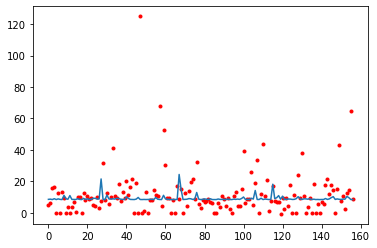

In [52]:
if PROVIDE_OWN_INPUT:
    plt.plot(range(y_train.shape[0]),y_train,'.r')
else:
    plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[3]))], pred_list[3])


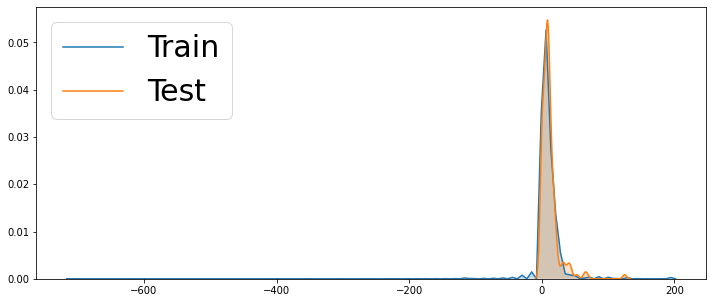

In [53]:
plt.subplots(figsize=(12,5))
sns.kdeplot(y_train, shade=True, label='Train')
sns.kdeplot(y_test, shade = True, label= 'Test')
plt.legend( prop={'size': 30})

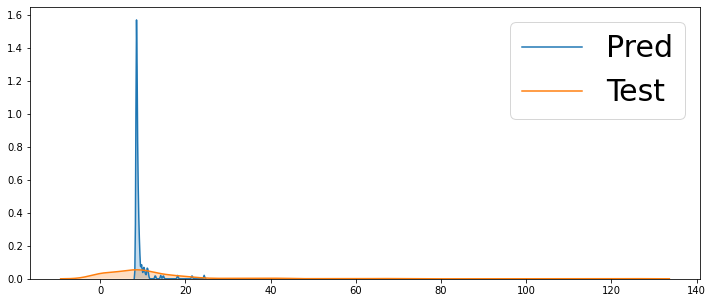

In [54]:
plt.subplots(figsize=(12,5))
sns.kdeplot(pred_list[3], shade=True, label='Pred')
sns.kdeplot(y_test, shade = True, label= 'Test')
plt.legend( prop={'size': 30})

# **M/Sales Prediction**

In [55]:
data2 = data.iloc[:,: ].drop('Ev/EBITDA', axis=1)

In [56]:
data2.head()

,Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Cons OCF,Cons PAT,OCF/PAT,FR_Dividend Pay Out Ratio(%),Free Float,M/Sales
0,3I Infotech Ltd.,1681.02,32.07,-39.82,-70.15,-1.18,0.83,5.61,-154.46,-360.03,0.43,0.00,64.500000,0.24
1,3M India Ltd.,1405.10,17.29,8.81,22.66,32.52,3.54,0.25,20.89,64.77,0.32,0.00,12.950000,3.61
2,Aavas Financiers Ltd.,0.29,55.55,2.74,0.03,0.60,0.02,0.00,-0.64,0.00,-160.45,0.00,23.129121,0.00
3,ABB India Ltd.,7451.79,10.57,4.96,14.58,24.79,2.37,0.00,120.00,184.71,0.65,34.43,13.150000,2.25
4,Abbott India Ltd.,1490.21,25.88,15.96,56.69,84.84,3.22,0.00,24.07,120.39,0.20,30.00,21.680000,2.50


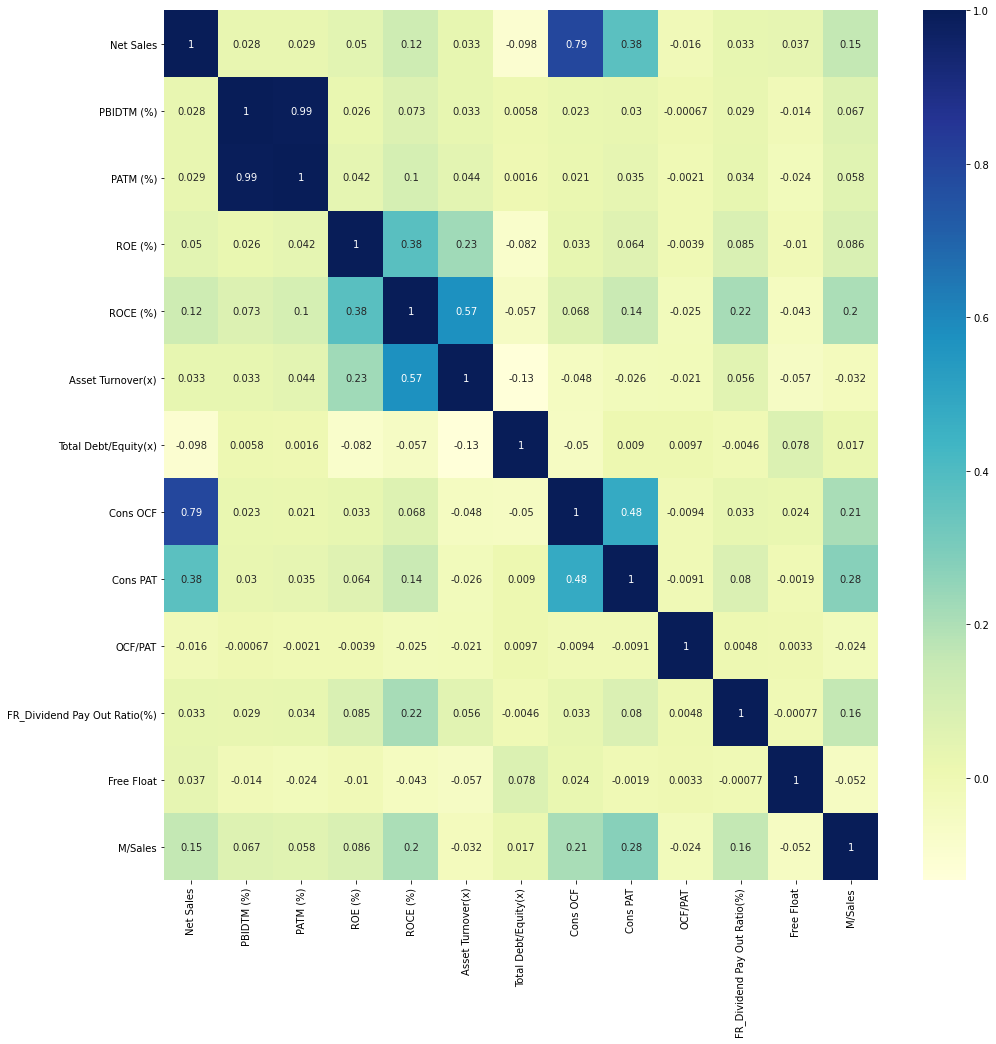

In [57]:
plt.figure(figsize=(16,16))
cor = data2.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

In [58]:
cor_target = abs(cor["M/Sales"])
cor_target.sort_values(ascending=False)[:6]

M/Sales                         1.000000
Cons PAT                        0.276746
Cons OCF                        0.207489
ROCE (%)                        0.203303
FR_Dividend Pay Out Ratio(%)    0.158442
Net Sales                       0.154774
Name: M/Sales, dtype: float64

In [59]:
X,y = data2[['Net Sales', 'ROCE (%)', 'Cons OCF', 'Cons PAT',
       'FR_Dividend Pay Out Ratio(%)']], data2['M/Sales']

In [60]:
from sklearn.model_selection import train_test_split
if PROVIDE_OWN_INPUT:
    X_test =  pd.read_csv('test_data.csv')
    X_train,y_train = X,y
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [61]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=10),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR',]
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

### Mean Squared Error
> Lower the value of error, better the performance

In [62]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, round(mean_squared_error(y_test.values, p)**0.5,5),))

 0 LassoCV                 2.33507
 1 XGBRegressor            2.22658
 2 RidgeCV                 2.34139
 3 BayesianRidge           2.28742
 4 ARDRegression           2.65127
 5 ElasticNetCV            2.33509
 6 LassoLarsCV             2.33400
 7 SVR                     2.48445


### R2 Score
> Higher the score, better the model. A perfect model willl have the highest value(i.e 1).

In [64]:
from sklearn.metrics import r2_score
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, r2_score(y_test.values, p)))

 0 LassoCV                 0.12086
 1 XGBRegressor            0.20065
 2 RidgeCV                 0.11609
 3 BayesianRidge           0.15637
 4 ARDRegression           -0.13336
 5 ElasticNetCV            0.12084
 6 LassoLarsCV             0.12166
 7 SVR                     0.00478


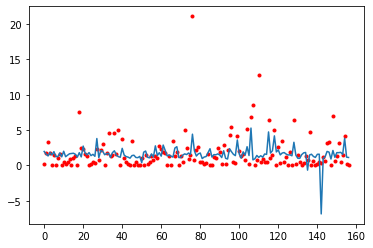

In [67]:
if PROVIDE_OWN_INPUT:
    plt.plot(range(y_train.shape[0]),y_train,'.r')
else:
    plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[3]))], pred_list[3])

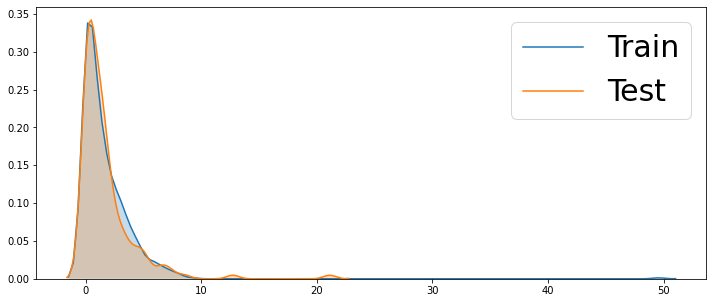

In [68]:
plt.subplots(figsize=(12,5))
sns.kdeplot(y_train, shade=True, label='Train')
sns.kdeplot(y_test, shade = True, label= 'Test')
plt.legend( prop={'size': 30})

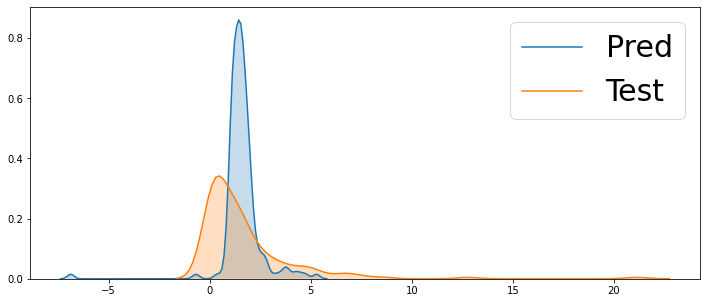

In [69]:
plt.subplots(figsize=(12,5))
sns.kdeplot(pred_list[3], shade=True, label='Pred')
sns.kdeplot(y_test, shade = True, label= 'Test')
plt.legend( prop={'size': 30})